In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
# This function will convert categorical variables into the category type and return the counts of that column
def set_as_category_return_counter(data, key):
    data[key] = data[key].astype('category')
    return Counter(data[key])

In [4]:
# EDA
import matplotlib.pyplot as plt
from collections import Counter
print(train_data.columns.values)

def preprocess_data(data):
    # Bar plots/histograms to see different values for predictors
    driving_to_data = set_as_category_return_counter(data, 'Driving_to')
    passenger_data = set_as_category_return_counter(data, 'Passanger')
    weather_data = set_as_category_return_counter(data, 'Weather')

    data['Temperature'] = data['Temperature'].astype("float")

    time_data = set_as_category_return_counter(data, 'Time')
    coupon_data = set_as_category_return_counter(data, 'Coupon')
    coupon_validity_data = set_as_category_return_counter(data, 'Coupon_validity')
    gender_data = set_as_category_return_counter(data, 'Gender')

    age_data = data['Age']
    age_data = age_data.astype("string")
    age_data.replace(to_replace="below21", value="21", inplace=True)
    age_data.replace(to_replace="50plus", value="50", inplace=True)
    age_data = age_data.astype("int")
    data['Age'] = age_data

    marital_status_data = set_as_category_return_counter(data, 'Maritalstatus')
    
    data['Children'] = data['Children'].astype("int")
    
    education_data = set_as_category_return_counter(data, 'Education')
    occupation_data = set_as_category_return_counter(data, 'Occupation')
    income_data = set_as_category_return_counter(data, 'Income')

    bar_data = data['Bar']
    max_bar_val = max(bar_data)
    bar_data.fillna(max_bar_val + 1, inplace=True)
    bar_data = bar_data.astype("int")
    data['Bar'] = bar_data

    coffeehouse_data = data['Coffeehouse']
    max_coffeehouse_val = max(coffeehouse_data)
    coffeehouse_data.fillna(max_coffeehouse_val + 1, inplace=True)
    coffeehouse_data = coffeehouse_data.astype("int")
    data['Coffeehouse'] = coffeehouse_data

    carryaway_data = data['Carryaway']
    max_carryaway_val = max(carryaway_data)
    carryaway_data.fillna(max_carryaway_val + 1, inplace=True)
    carryaway_data = carryaway_data.astype("int")
    data['Carryaway'] = carryaway_data

    restaurantlessthan20_data = data['Restaurantlessthan20']
    max_restaurantlessthan20_val = max(restaurantlessthan20_data)
    restaurantlessthan20_data.fillna(max_restaurantlessthan20_val + 1, inplace=True)
    restaurantlessthan20_data = restaurantlessthan20_data.astype("int")
    data['Restaurantlessthan20'] = restaurantlessthan20_data

    restaurant20to50_data = data['Restaurant20to50']
    max_restaurant20to50_val = max(restaurant20to50_data)
    restaurant20to50_data.fillna(max_restaurant20to50_val + 1, inplace=True)
    restaurant20to50_data = restaurant20to50_data.astype("int")
    data['Restaurant20to50'] = restaurant20to50_data

    data['Direction_same'] = data['Direction_same'].astype("int")

    data['Distance'] = data['Distance'].astype("int")
    
    return driving_to_data, passenger_data, weather_data, data['Temperature'], time_data, coupon_data, coupon_validity_data, gender_data, data['Age'], marital_status_data, data['Children'], education_data, occupation_data, income_data, data['Bar'], data['Coffeehouse'], data['Carryaway'], data['Restaurantlessthan20'], data['Restaurant20to50'], data['Direction_same'], data['Distance']

out = preprocess_data(train_data)
preprocess_data(test_data)

driving_to_data, passenger_data, weather_data, temperature_data, time_data, coupon_data, coupon_validity_data, gender_data, age_data, marital_status_data, children_data, education_data, occupation_data, income_data, bar_data, coffeehouse_data, carryaway_data, restaurantlessthan20_data, restaurant20to50_data, direction_same_data, distance_data = out

['id' 'Decision' 'Driving_to' 'Passanger' 'Weather' 'Temperature' 'Time'
 'Coupon' 'Coupon_validity' 'Gender' 'Age' 'Maritalstatus' 'Children'
 'Education' 'Occupation' 'Income' 'Bar' 'Coffeehouse' 'Carryaway'
 'Restaurantlessthan20' 'Restaurant20to50' 'Direction_same' 'Distance']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

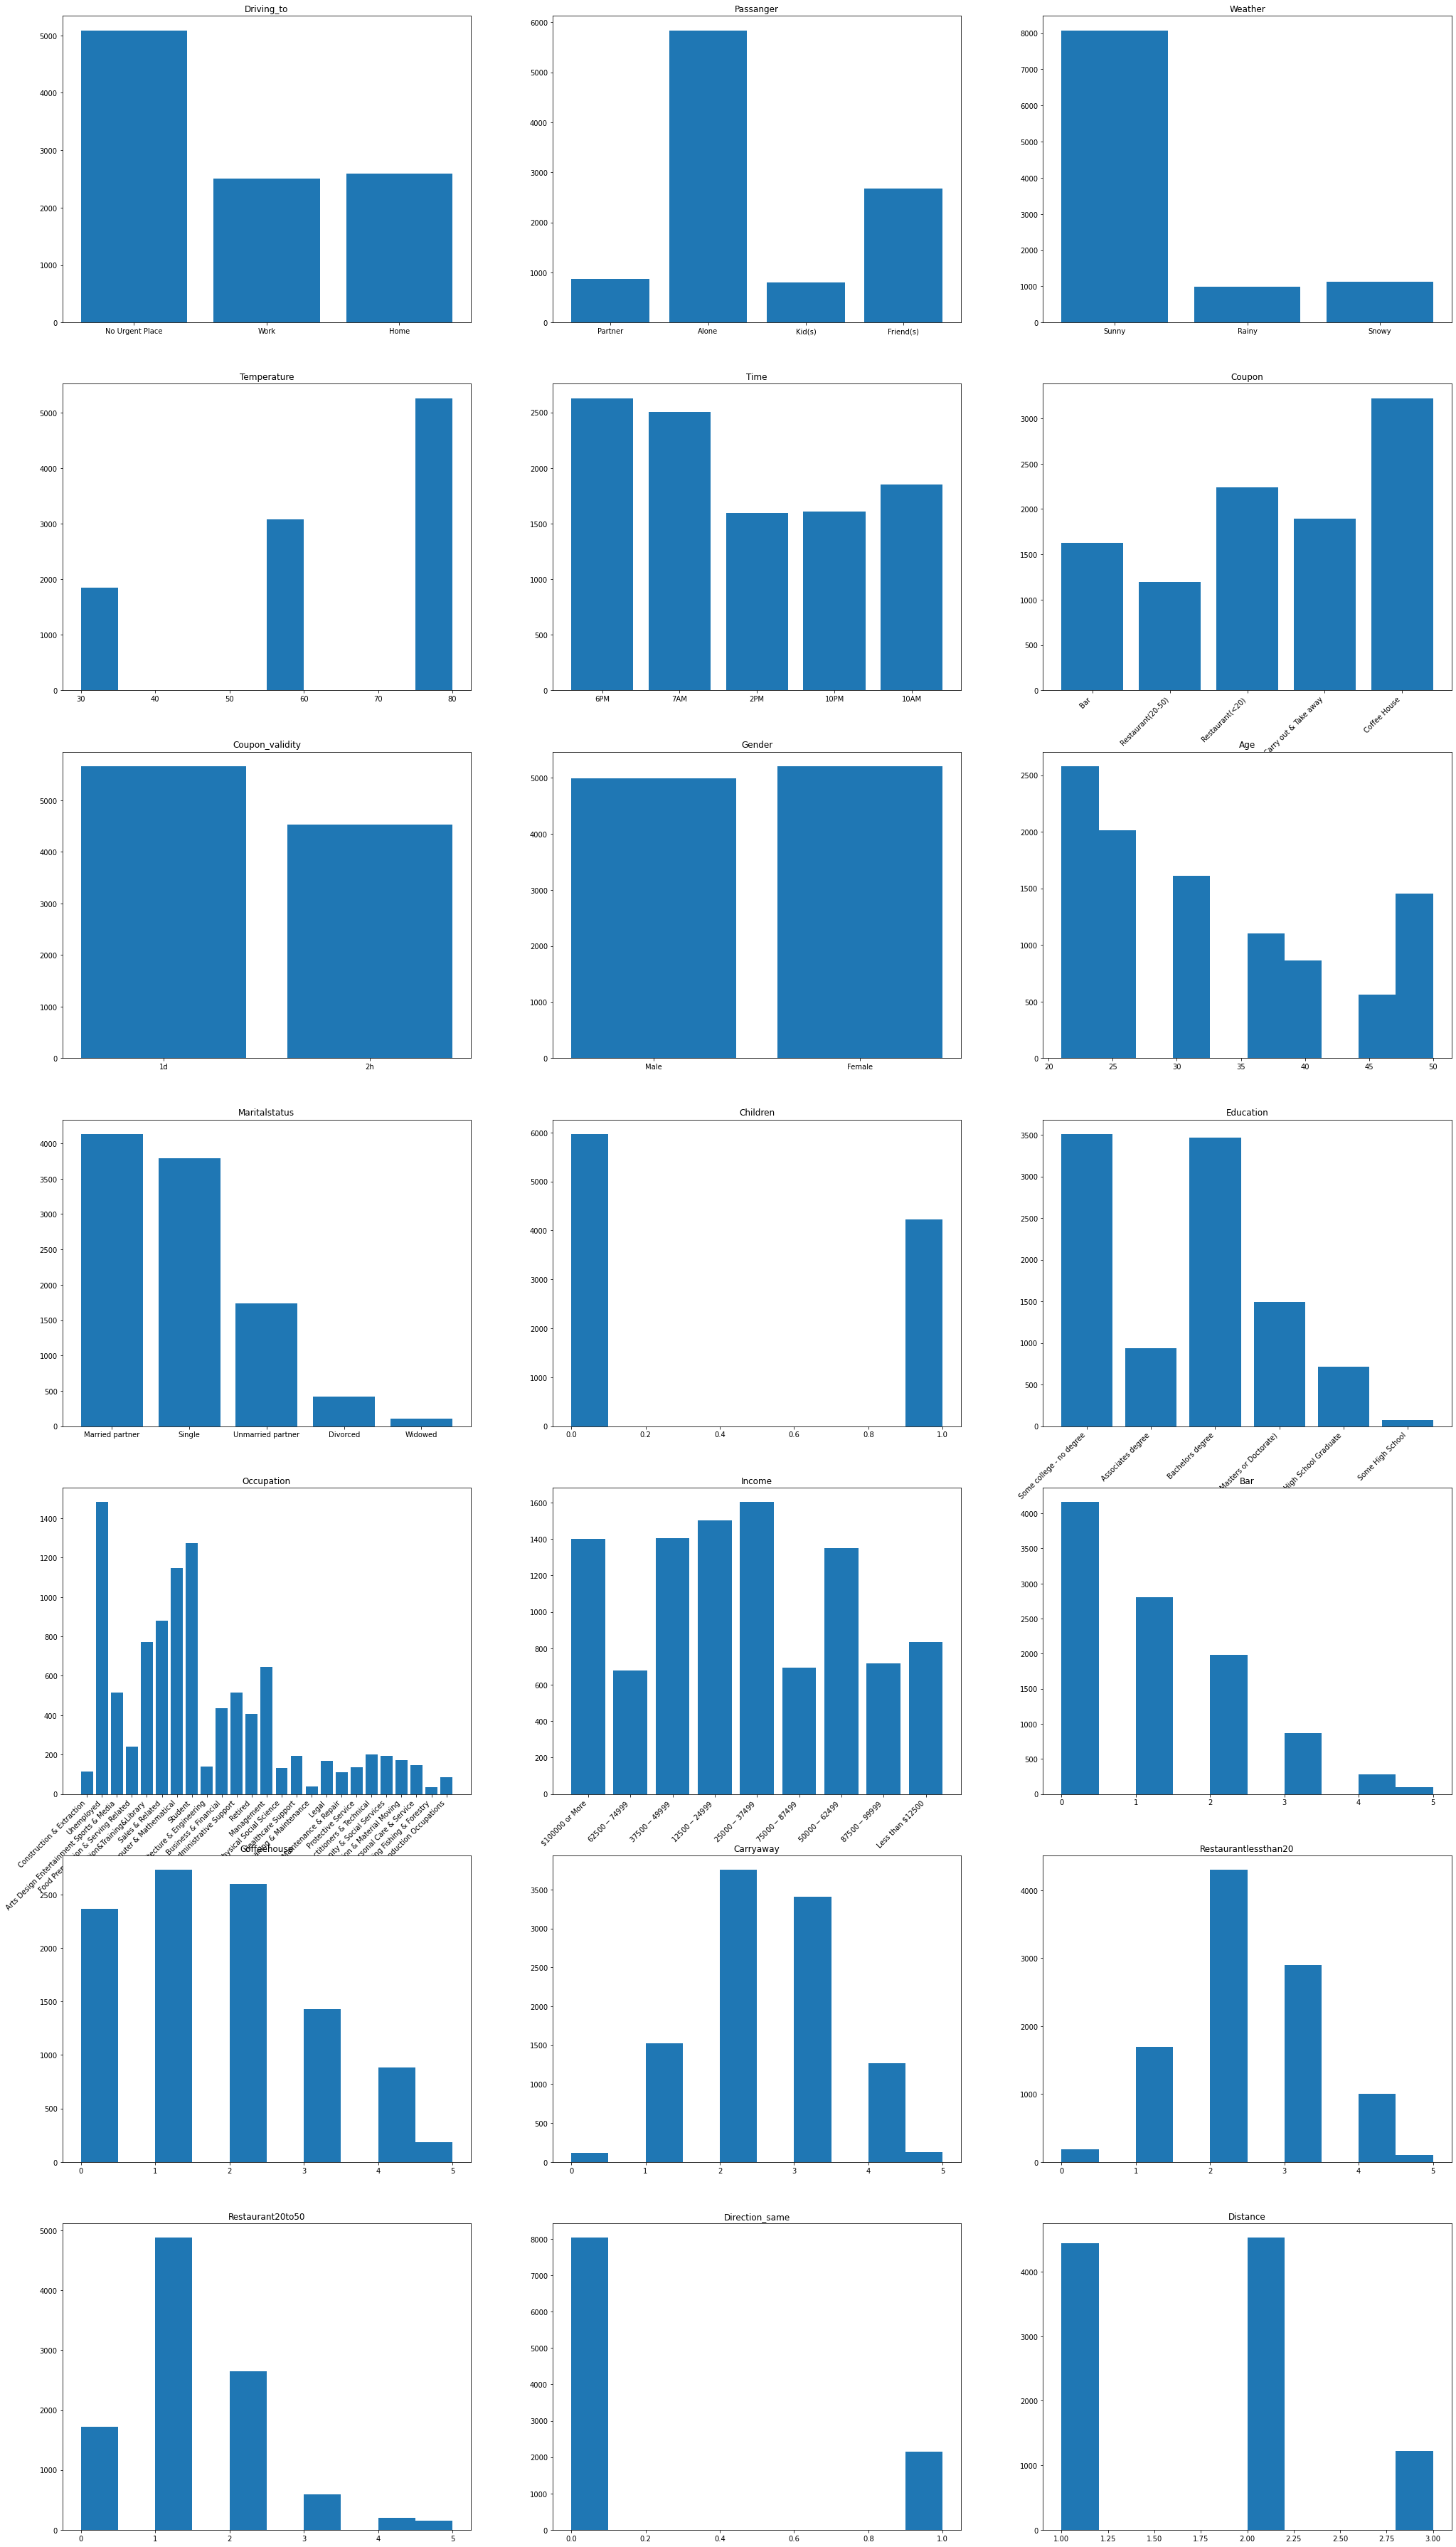

In [5]:
# Plot different column data for training data
fig, axs = plt.subplots(7, 3, figsize=(35, 65))
axs[0, 0].bar(driving_to_data.keys(), driving_to_data.values())
axs[0, 1].bar(passenger_data.keys(), passenger_data.values())
axs[0, 2].bar(weather_data.keys(), weather_data.values())
axs[1, 0].hist(temperature_data)
axs[1, 1].bar(time_data.keys(), time_data.values())
axs[1, 2].bar(coupon_data.keys(), coupon_data.values())
axs[2, 0].bar(coupon_validity_data.keys(), coupon_validity_data.values())
axs[2, 1].bar(gender_data.keys(), gender_data.values())
axs[2, 2].hist(age_data)
axs[3, 0].bar(marital_status_data.keys(), marital_status_data.values())
axs[3, 1].hist(children_data)
axs[3, 2].bar(education_data.keys(), education_data.values())
axs[4, 0].bar(occupation_data.keys(), occupation_data.values())
axs[4, 1].bar(income_data.keys(), income_data.values())
axs[4, 2].hist(bar_data)
axs[5, 0].hist(coffeehouse_data)
axs[5, 1].hist(carryaway_data)
axs[5, 2].hist(restaurantlessthan20_data)
axs[6, 0].hist(restaurant20to50_data)
axs[6, 1].hist(direction_same_data)
axs[6, 2].hist(distance_data)

axs[0, 0].set_title('Driving_to')
axs[0, 1].set_title('Passanger')
axs[0, 2].set_title('Weather')
axs[1, 0].set_title('Temperature')
axs[1, 1].set_title('Time')
axs[1, 2].set_title('Coupon')
axs[2, 0].set_title('Coupon_validity')
axs[2, 1].set_title('Gender')
axs[2, 2].set_title('Age')
axs[3, 0].set_title('Maritalstatus')
axs[3, 1].set_title('Children')
axs[3, 2].set_title('Education')
axs[4, 0].set_title('Occupation')
axs[4, 1].set_title('Income')
axs[4, 2].set_title('Bar')
axs[5, 0].set_title('Coffeehouse')
axs[5, 1].set_title('Carryaway')
axs[5, 2].set_title('Restaurantlessthan20')
axs[6, 0].set_title('Restaurant20to50')
axs[6, 1].set_title('Direction_same')
axs[6, 2].set_title('Distance')

plt.setp(axs[1, 2].get_xticklabels(), rotation=45, ha='right')
plt.setp(axs[3, 2].get_xticklabels(), rotation=45, ha='right')
plt.setp(axs[4, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axs[4, 1].get_xticklabels(), rotation=45, ha='right')

Text(0.5, 1.0, 'Decision')

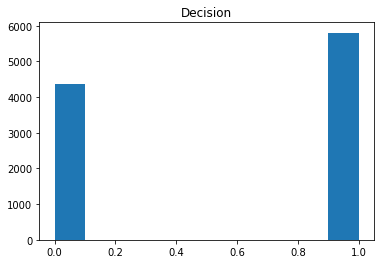

In [6]:
labels = train_data['Decision']
plt.hist(labels)
plt.title('Decision')

In [7]:
def convert_categories_to_numerics(data):
    cat_columns = data.select_dtypes(['category']).columns
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    
convert_categories_to_numerics(train_data)
convert_categories_to_numerics(test_data)
print(train_data)
print(test_data)

          id  Decision  Driving_to  Passanger  Weather  Temperature  Time  \
0          1         1           1          3        2         80.0     3   
1          2         0           2          0        2         80.0     4   
2          3         1           1          3        2         80.0     3   
3          4         1           2          0        2         55.0     4   
4          5         1           0          0        2         30.0     3   
...      ...       ...         ...        ...      ...          ...   ...   
10179  10180         0           1          0        2         80.0     0   
10180  10181         1           1          1        2         55.0     2   
10181  10182         0           1          1        2         55.0     2   
10182  10183         0           1          0        2         80.0     1   
10183  10184         0           0          0        2         80.0     3   

       Coupon  Coupon_validity  Gender  ...  Education  Occupation  Income 

In [8]:
# I will use three methods for prediction: XGBoost, SVM, and Logistic Regression

train_data_X = train_data.drop(columns=['id', 'Decision'])
train_data_y = train_data['Decision']
test_data_X = test_data.drop(columns=['id'])

In [17]:
# XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(train_data_X, label=train_data_y)

num_round = 300
for i in range(1, 5):
    param = {'max_depth': i, 'eta': 1, 'objective': 'binary:hinge'}
    param['nthread'] = 4
    param['eval_metric'] = ['auc', 'error']
    evallist = [(dtrain, 'train')]
    
    bst = xgb.train(param, dtrain, num_round, evallist)
    dtest = xgb.DMatrix(test_data_X)
    ypred_train = bst.predict(dtrain).astype(int)
    accuracy = accuracy_score(train_data_y, ypred_train)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    ypred_test = bst.predict(dtest).astype(int)

out = {'id': [i for i in range(1, len(ypred_test) + 1)], 'Decision': ypred_test}
df_out = pd.DataFrame(data=out)
df_out.to_csv('./submission.csv', index=False)

[0]	train-auc:0.50000	train-error:0.43009
[1]	train-auc:0.50000	train-error:0.43009
[2]	train-auc:0.55405	train-error:0.39945
[3]	train-auc:0.55405	train-error:0.39945
[4]	train-auc:0.55405	train-error:0.39945
[5]	train-auc:0.55405	train-error:0.39945
[6]	train-auc:0.55405	train-error:0.39945
[7]	train-auc:0.55405	train-error:0.39945
[8]	train-auc:0.55405	train-error:0.39945
[9]	train-auc:0.55405	train-error:0.39945
[10]	train-auc:0.55405	train-error:0.39945
[11]	train-auc:0.55405	train-error:0.39945
[12]	train-auc:0.55405	train-error:0.39945
[13]	train-auc:0.55405	train-error:0.39945
[14]	train-auc:0.55405	train-error:0.39945
[15]	train-auc:0.55405	train-error:0.39945
[16]	train-auc:0.55405	train-error:0.39945
[17]	train-auc:0.55405	train-error:0.39945
[18]	train-auc:0.55405	train-error:0.39945
[19]	train-auc:0.55405	train-error:0.39945
[20]	train-auc:0.55405	train-error:0.39945
[21]	train-auc:0.55405	train-error:0.39945
[22]	train-auc:0.55405	train-error:0.39945
[23]	train-auc:0.5540

[189]	train-auc:0.62453	train-error:0.39100
[190]	train-auc:0.62453	train-error:0.39100
[191]	train-auc:0.62453	train-error:0.39100
[192]	train-auc:0.62453	train-error:0.39100
[193]	train-auc:0.62453	train-error:0.39100
[194]	train-auc:0.62453	train-error:0.39100
[195]	train-auc:0.62453	train-error:0.39100
[196]	train-auc:0.62453	train-error:0.39100
[197]	train-auc:0.62453	train-error:0.39100
[198]	train-auc:0.62453	train-error:0.39100
[199]	train-auc:0.62453	train-error:0.39100
[200]	train-auc:0.62453	train-error:0.39100
[201]	train-auc:0.62453	train-error:0.39100
[202]	train-auc:0.62453	train-error:0.39100
[203]	train-auc:0.62453	train-error:0.39100
[204]	train-auc:0.62453	train-error:0.39100
[205]	train-auc:0.62453	train-error:0.39100
[206]	train-auc:0.62453	train-error:0.39100
[207]	train-auc:0.62453	train-error:0.39100
[208]	train-auc:0.62453	train-error:0.39100
[209]	train-auc:0.62453	train-error:0.39100
[210]	train-auc:0.62453	train-error:0.39100
[211]	train-auc:0.62453	train-er

[77]	train-auc:0.71169	train-error:0.27042
[78]	train-auc:0.71292	train-error:0.26925
[79]	train-auc:0.71547	train-error:0.26650
[80]	train-auc:0.71610	train-error:0.26600
[81]	train-auc:0.71728	train-error:0.26571
[82]	train-auc:0.71754	train-error:0.26552
[83]	train-auc:0.71825	train-error:0.26502
[84]	train-auc:0.71762	train-error:0.26552
[85]	train-auc:0.71774	train-error:0.26532
[86]	train-auc:0.71894	train-error:0.26414
[87]	train-auc:0.71971	train-error:0.26345
[88]	train-auc:0.72079	train-error:0.26267
[89]	train-auc:0.72003	train-error:0.26326
[90]	train-auc:0.72056	train-error:0.26306
[91]	train-auc:0.72176	train-error:0.26178
[92]	train-auc:0.72157	train-error:0.26198
[93]	train-auc:0.72171	train-error:0.26188
[94]	train-auc:0.72245	train-error:0.26110
[95]	train-auc:0.72271	train-error:0.26090
[96]	train-auc:0.72348	train-error:0.26021
[97]	train-auc:0.72468	train-error:0.25903
[98]	train-auc:0.72474	train-error:0.25884
[99]	train-auc:0.72557	train-error:0.25825
[100]	train

[264]	train-auc:0.75708	train-error:0.22938
[265]	train-auc:0.75706	train-error:0.22938
[266]	train-auc:0.75768	train-error:0.22899
[267]	train-auc:0.75837	train-error:0.22820
[268]	train-auc:0.75846	train-error:0.22810
[269]	train-auc:0.75863	train-error:0.22801
[270]	train-auc:0.75760	train-error:0.22889
[271]	train-auc:0.75762	train-error:0.22899
[272]	train-auc:0.75754	train-error:0.22899
[273]	train-auc:0.75705	train-error:0.22948
[274]	train-auc:0.75731	train-error:0.22928
[275]	train-auc:0.75791	train-error:0.22879
[276]	train-auc:0.75785	train-error:0.22889
[277]	train-auc:0.75934	train-error:0.22722
[278]	train-auc:0.75824	train-error:0.22791
[279]	train-auc:0.75826	train-error:0.22791
[280]	train-auc:0.75883	train-error:0.22751
[281]	train-auc:0.75855	train-error:0.22771
[282]	train-auc:0.75843	train-error:0.22810
[283]	train-auc:0.75843	train-error:0.22801
[284]	train-auc:0.75969	train-error:0.22673
[285]	train-auc:0.75986	train-error:0.22673
[286]	train-auc:0.75918	train-er

[153]	train-auc:0.80105	train-error:0.18843
[154]	train-auc:0.79982	train-error:0.18951
[155]	train-auc:0.79959	train-error:0.18961
[156]	train-auc:0.80077	train-error:0.18834
[157]	train-auc:0.80122	train-error:0.18804
[158]	train-auc:0.80105	train-error:0.18824
[159]	train-auc:0.80091	train-error:0.18834
[160]	train-auc:0.79997	train-error:0.18912
[161]	train-auc:0.80017	train-error:0.18883
[162]	train-auc:0.80059	train-error:0.18853
[163]	train-auc:0.80039	train-error:0.18883
[164]	train-auc:0.80054	train-error:0.18863
[165]	train-auc:0.80122	train-error:0.18794
[166]	train-auc:0.80163	train-error:0.18755
[167]	train-auc:0.80234	train-error:0.18686
[168]	train-auc:0.80200	train-error:0.18706
[169]	train-auc:0.80220	train-error:0.18676
[170]	train-auc:0.80191	train-error:0.18726
[171]	train-auc:0.80205	train-error:0.18735
[172]	train-auc:0.80219	train-error:0.18735
[173]	train-auc:0.80305	train-error:0.18627
[174]	train-auc:0.80394	train-error:0.18539
[175]	train-auc:0.80458	train-er

[40]	train-auc:0.78011	train-error:0.20837
[41]	train-auc:0.78149	train-error:0.20689
[42]	train-auc:0.78267	train-error:0.20562
[43]	train-auc:0.78346	train-error:0.20503
[44]	train-auc:0.78668	train-error:0.20238
[45]	train-auc:0.79001	train-error:0.19894
[46]	train-auc:0.79047	train-error:0.19825
[47]	train-auc:0.79084	train-error:0.19796
[48]	train-auc:0.79095	train-error:0.19786
[49]	train-auc:0.79373	train-error:0.19521
[50]	train-auc:0.79322	train-error:0.19531
[51]	train-auc:0.79526	train-error:0.19324
[52]	train-auc:0.79622	train-error:0.19246
[53]	train-auc:0.79626	train-error:0.19236
[54]	train-auc:0.79748	train-error:0.19148
[55]	train-auc:0.80071	train-error:0.18853
[56]	train-auc:0.80105	train-error:0.18814
[57]	train-auc:0.80297	train-error:0.18627
[58]	train-auc:0.80343	train-error:0.18568
[59]	train-auc:0.80326	train-error:0.18578
[60]	train-auc:0.80446	train-error:0.18490
[61]	train-auc:0.80454	train-error:0.18460
[62]	train-auc:0.80655	train-error:0.18254
[63]	train-

[228]	train-auc:0.86821	train-error:0.12490
[229]	train-auc:0.86830	train-error:0.12480
[230]	train-auc:0.86773	train-error:0.12529
[231]	train-auc:0.86852	train-error:0.12461
[232]	train-auc:0.86793	train-error:0.12510
[233]	train-auc:0.86838	train-error:0.12470
[234]	train-auc:0.86815	train-error:0.12500
[235]	train-auc:0.86784	train-error:0.12529
[236]	train-auc:0.86804	train-error:0.12510
[237]	train-auc:0.86835	train-error:0.12490
[238]	train-auc:0.86812	train-error:0.12500
[239]	train-auc:0.86764	train-error:0.12549
[240]	train-auc:0.86781	train-error:0.12529
[241]	train-auc:0.86761	train-error:0.12549
[242]	train-auc:0.86798	train-error:0.12520
[243]	train-auc:0.86652	train-error:0.12657
[244]	train-auc:0.86821	train-error:0.12510
[245]	train-auc:0.86758	train-error:0.12559
[246]	train-auc:0.86718	train-error:0.12598
[247]	train-auc:0.86738	train-error:0.12569
[248]	train-auc:0.86678	train-error:0.12628
[249]	train-auc:0.86767	train-error:0.12549
[250]	train-auc:0.86721	train-er

In [16]:
# SVM
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train_data_X, train_data_y)

ypred_train = clf.predict(train_data_X)
accuracy = accuracy_score(train_data_y, ypred_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
ypred_test = clf.predict(test_data_X)

out = {'id': [i for i in range(1, len(ypred_test) + 1)], 'Decision': ypred_test}
df_out = pd.DataFrame(data=out)
df_out.to_csv('./submission.csv', index=False)

Accuracy: 80.76%


In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(train_data_X, train_data_y)

ypred_train = clf.predict(train_data_X)
accuracy = accuracy_score(train_data_y, ypred_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
ypred_test = clf.predict(test_data_X)

out = {'id': [i for i in range(1, len(ypred_test) + 1)], 'Decision': ypred_test}
df_out = pd.DataFrame(data=out)
df_out.to_csv('./submission.csv', index=False)

Accuracy: 63.18%
